## I would like to find out if churn is influenced by income level?
## Also if clients between ages 35 and 38 are more prone to churn than younger ones?

In [5]:
import pandas as pd

In [6]:
Customertravel = pd.read_csv("/Users/inesrodriguez/Downloads/Customertravel.csv")

In [7]:
Customertravel.head(21)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0
5,27,Yes,High Income,1,No,Yes,1
6,34,No,Middle Income,4,Yes,Yes,0
7,34,No,Low Income,2,Yes,No,1
8,30,No,Low Income,3,No,Yes,0
9,36,Yes,High Income,1,No,No,1


## Renaming columns for easy understanding

In [8]:
Customertravel.rename(columns = {'AnnualIncomeClass': 'IncomeLevel'}, inplace = True)

In [9]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [10]:
Customertravel.rename(columns = {'ServicesOpted': 'ServicesAcquired'}, inplace = True)

In [11]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [12]:
Customertravel.rename(columns = {'Target': 'Churn'}, inplace = True)

In [13]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [14]:
Customertravel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   IncomeLevel                 954 non-null    object
 3   ServicesAcquired            954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [15]:
import numpy as np

In [16]:
Customertravel.groupby('Age')['ServicesAcquired'].sum()

Age
27    148
28    186
29    176
30    599
31    214
33     64
34    269
35    127
36    151
37    319
38     72
Name: ServicesAcquired, dtype: int64

## Recoding into new variables

In [17]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [18]:
def FrequentFlyer (series):
    if series == "Yes":
        return 0
    if series == "No":
        return 1
    if series == "No Record":
        return 2
       

In [19]:
Customertravel['FrequentFlyerR']= Customertravel['FrequentFlyer'].apply(FrequentFlyer)

In [20]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyerR
0,34,No,Middle Income,6,No,Yes,0,1
1,34,Yes,Low Income,5,Yes,No,1,0
2,37,No,Middle Income,3,Yes,No,0,1
3,30,No,Middle Income,2,No,No,0,1
4,30,No,Low Income,1,No,No,0,1


In [21]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyerR
0,34,No,Middle Income,6,No,Yes,0,1
1,34,Yes,Low Income,5,Yes,No,1,0
2,37,No,Middle Income,3,Yes,No,0,1
3,30,No,Middle Income,2,No,No,0,1
4,30,No,Low Income,1,No,No,0,1


In [20]:
def IncomeLevel (series):
    if series == "Low Income":
        return 0
    if series == "Middle Income":
        return 1
    if series == "High Income":
        return 2

In [21]:
Customertravel['IncomeLevelR']= Customertravel['IncomeLevel'].apply(IncomeLevel)

In [22]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyerR,IncomeLevelR
0,34,No,Middle Income,6,No,Yes,0,1,1
1,34,Yes,Low Income,5,Yes,No,1,0,0
2,37,No,Middle Income,3,Yes,No,0,1,1
3,30,No,Middle Income,2,No,No,0,1,1
4,30,No,Low Income,1,No,No,0,1,0


In [23]:
import seaborn as sns

<AxesSubplot:>

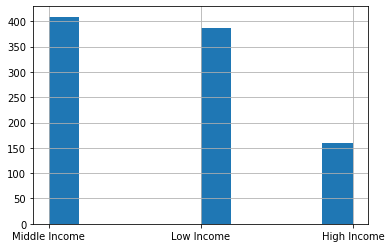

In [24]:
Customertravel.IncomeLevel.hist()

<AxesSubplot:>

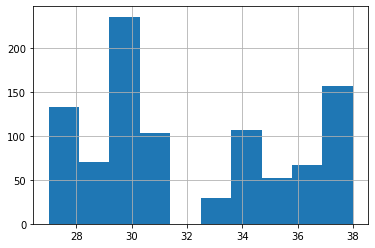

In [21]:
Customertravel.Age.hist()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ServicesAcquired'}>],
       [<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'FrequentFlyerR'}>],
       [<AxesSubplot:title={'center':'IncomeLevelR'}>, <AxesSubplot:>]],
      dtype=object)

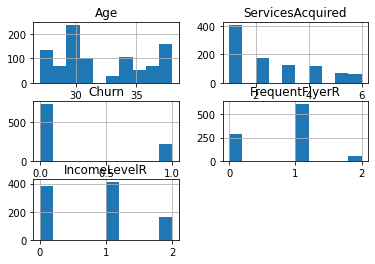

In [22]:
Customertravel.hist()

/Users/inesrodriguez/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IncomeLevelR', ylabel='Density'>

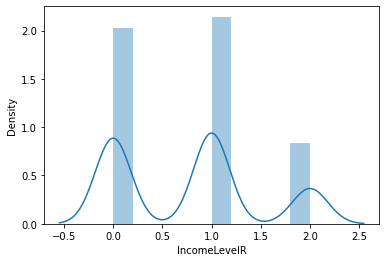

In [23]:
sns.distplot(Customertravel['IncomeLevelR'])

In [24]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

<AxesSubplot:>

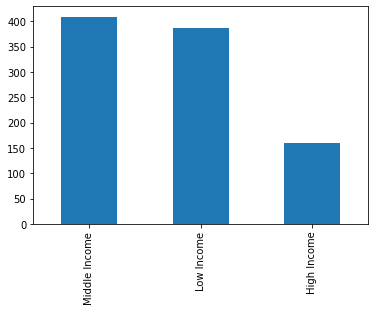

In [25]:
Customertravel['IncomeLevel'].value_counts().plot(kind='bar')

## 1=Customer Churn= Customer stop doing business  / 0= Customer doesn't Churn= Customers continue doing business

<AxesSubplot:>

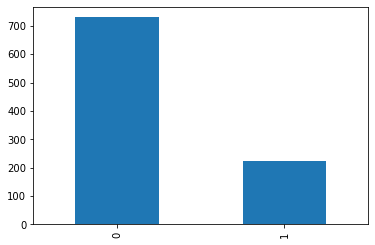

In [26]:
Customertravel['Churn'].value_counts().plot(kind='bar')

<AxesSubplot:>

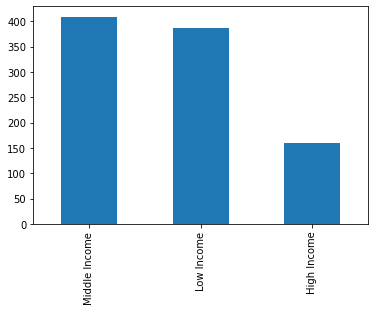

In [27]:
Customertravel['IncomeLevel'].value_counts().plot(kind='bar')

## It seems as that the customers that uses these services are in the middle and lower incomer ranges rather than higher income. Looking at the bar chart I did on age, looks like the higher number of users are below 30 years old. This could be in because they could be college students and still can't afford a more luxurius vacation. Higher income customers might have the income to pay for other services and might not see a need on these services.  

In [2]:
Customertravel.Age.min()

NameError: name 'Customertravel' is not defined

In [26]:
Customertravel.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyerR,IncomeLevelR
0,34,No,Middle Income,6,No,Yes,0,1,1
1,34,Yes,Low Income,5,Yes,No,1,0,0
2,37,No,Middle Income,3,Yes,No,0,1,1
3,30,No,Middle Income,2,No,No,0,1,1
4,30,No,Low Income,1,No,No,0,1,0


In [29]:
Customertravel.groupby('Age', as_index= False).agg("Churn")

In [35]:
grouped_CT = Customertravel.groupby(["Age", "Churn"])

In [39]:
grouped_CT.head()

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyerR,IncomeLevelR
0,34,No,Middle Income,6,No,Yes,0,1,1
1,34,Yes,Low Income,5,Yes,No,1,0,0
2,37,No,Middle Income,3,Yes,No,0,1,1
3,30,No,Middle Income,2,No,No,0,1,1
4,30,No,Low Income,1,No,No,0,1,0
...,...,...,...,...,...,...,...,...,...
379,29,No,Low Income,2,Yes,No,1,1,0
489,33,Yes,High Income,4,No,No,1,0,2
513,29,Yes,High Income,1,No,No,1,0,2
573,29,Yes,High Income,5,No,No,1,0,2


In [32]:
for key, item in grouped_CT:
    ct_group = grouped_CT.get_group(key)
    print(ct_group,"\n")

     Age FrequentFlyer    IncomeLevel  ServicesAcquired  \
32    27            No  Middle Income                 3   
40    27            No     Low Income                 5   
44    27            No  Middle Income                 3   
46    27            No     Low Income                 1   
148   27            No     Low Income                 1   
184   27            No     Low Income                 1   
198   27            No  Middle Income                 1   
206   27            No  Middle Income                 3   
298   27     No Record     Low Income                 1   
346   27            No     Low Income                 1   
354   27            No  Middle Income                 1   
378   27            No  Middle Income                 5   
426   27            No  Middle Income                 4   
460   27            No     Low Income                 1   
528   27            No  Middle Income                 1   
570   27            No  Middle Income                 6 

848             0   



In [40]:
CT_group = Customertravel.groupby("Age")["Churn"].count()

In [41]:
CT_group.head(10)

Age
27     62
28     71
29     70
30    236
31    103
33     29
34    107
35     52
36     67
37    126
Name: Churn, dtype: int64

In [43]:
Customertravel.groupby([Customertravel.index.Churn])

AttributeError: 'RangeIndex' object has no attribute 'Churn'

In [48]:
Customertravel.groupby(['Age', 'Churn']).count()

FrequentFlyer  IncomeLevel  ServicesAcquired  \
Age Churn                                                 
27  0                 27           27                27   
    1                 35           35                35   
28  0                 31           31                31   
    1                 40           40                40   
29  0                 57           57                57   
    1                 13           13                13   
30  0                202          202               202   
    1                 34           34                34   
31  0                 88           88                88   
    1                 15           15                15   
33  0                 21           21                21   
    1                  8            8                 8   
34  0                 87           87                87   
    1                 20           20                20   
35  0                 39           39                39   
    1                 13           13                13   
36  0                 51           51                51   
    1                 16           16                16   
37  0                 99           99                99   
    1                 27           27                27   
38  0                 28           28                28   
    1                  3            3                 3   

           AccountSyncedToSocialMedia  BookedHotelOrNot  FrequentFlyerR  \
Age Churn                                                                 
27  0                              27                27              27   
    1                              35                35              35   
28  0                              31                31              31   
    1                              40                40              40   
29  0                              57                57              57   
    1                              13                13              13   
30  0                             202               202             202   
    1                              34                34              34   
31  0                              88                88              88   
    1                              15                15              15   
33  0                              21                21              21   
    1                               8                 8               8   
34  0                              87                87              87   
    1                              20                20              20   
35  0                              39                39              39   
    1                              13                13              13   
36  0                              51                51              51   
    1                              16                16              16   
37  0                              99                99              99   
    1                              27                27              27   
38  0                              28                28              28   
    1                               3                 3               3   

           IncomeLevelR  
Age Churn                
27  0                27  
    1                35  
28  0                31  
    1                40  
29  0                57  
    1                13  
30  0               202  
    1                34  
31  0                88  
    1                15  
33  0                21  
    1                 8  
34  0                87  
    1                20  
35  0                39  
    1                13  
36  0                51  
    1                16  
37  0                99  
    1                27  
38  0                28  
    1                 3

In [58]:
def Churn (series):
    if series == 0:
        return "NotChurn"
    if series == 1:
        return "Churn"

In [59]:
Customertravel['ChurnR']= Customertravel['Churn'].apply(Churn)

In [60]:
Customertravel.head(21)

,Age,FrequentFlyer,IncomeLevel,ServicesAcquired,AccountSyncedToSocialMedia,BookedHotelOrNot,Churn,FrequentFlyerR,ChurnR
0,34,No,Middle Income,6,No,Yes,0,1,NotChurn
1,34,Yes,Low Income,5,Yes,No,1,0,Churn
2,37,No,Middle Income,3,Yes,No,0,1,NotChurn
3,30,No,Middle Income,2,No,No,0,1,NotChurn
4,30,No,Low Income,1,No,No,0,1,NotChurn
5,27,Yes,High Income,1,No,Yes,1,0,Churn
6,34,No,Middle Income,4,Yes,Yes,0,1,NotChurn
7,34,No,Low Income,2,Yes,No,1,1,Churn
8,30,No,Low Income,3,No,Yes,0,1,NotChurn
9,36,Yes,High Income,1,No,No,1,0,Churn


In [67]:
CustomerT_df = pd.crosstab(Customertravel['Age'], Customertravel['ChurnR']) CustomerT_df.plot.bar(stacked=True)

SyntaxError: invalid syntax (1867163060.py, line 1)